# <font color='pink'>Проектирование признаков</font>
(Feature Engineering)

Этот процесс также называют конструированием признаков или разработкой признаков. Все эти термины описывают процесс создания признаков, которые нужны для обучения модели.

Вы уже знакомы с методами создания столбцов в pandas из модуля PYTHON-11. Базовые приемы работы с данными в Pandas. Юнит 2. Базовые операции со столбцами DataFrame. Советуем повторить этот материал.

Новые признаки могут быть сконструированы двумя способами: 

1) с помощью внешних источников данных;
2) из существующего набора данных.

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

1) разбор категорий; 
2) разбор даты и времени;
3) разбор числовых признаков;
4) разбор текста.

<font color='yellow'>РАЗБОР ДАТЫ И ВРЕМЕНИ</font>

в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать. </br>
Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

<font color='yellow'>РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН</font>

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели.

<font color='yellow'>РАЗБОР ТЕКСТА</font>

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки. В названии вина вы можете заметить указание года произведения вина. </br>Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак. Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

<font color='3499ff'>Регулярные выражения</font> (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья [Python RegEx: практическое применение регулярок](https://tproger.ru/translations/regular-expression-python/).

Например, с помощью такого регулярного выражения <font color='green'>[^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+</font> можно найти любой email в тексте.
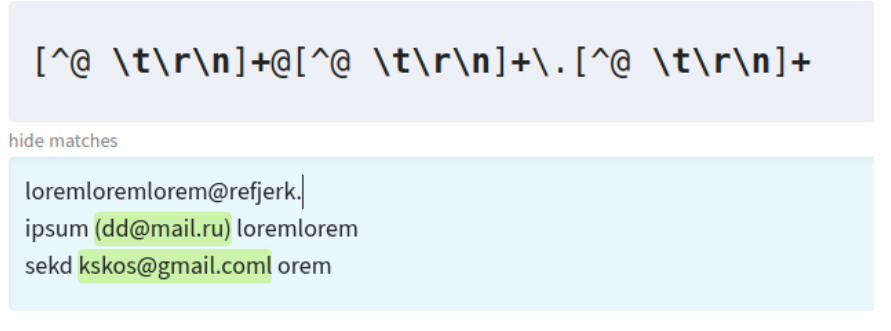

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом <font color='green'>str.findall()</font>. Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.

<font color='yellow'>РАЗБОР КАТЕГОРИЙ</font>

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

```
    data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
```

важным этапом проектирования признаков является обработка нечисловых (категориальных) признаков. Многие модели машинного обучения не умеют работать с <font color='3499ff'>категориальными данными</font>. Если мы передадим на вход модели такие признаки, она выдаст ошибку. 

Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется <font color='3499ff'>кодированием признаков</font>.

Для упрощения задачи мы будем использовать схему выбора метода кодирования

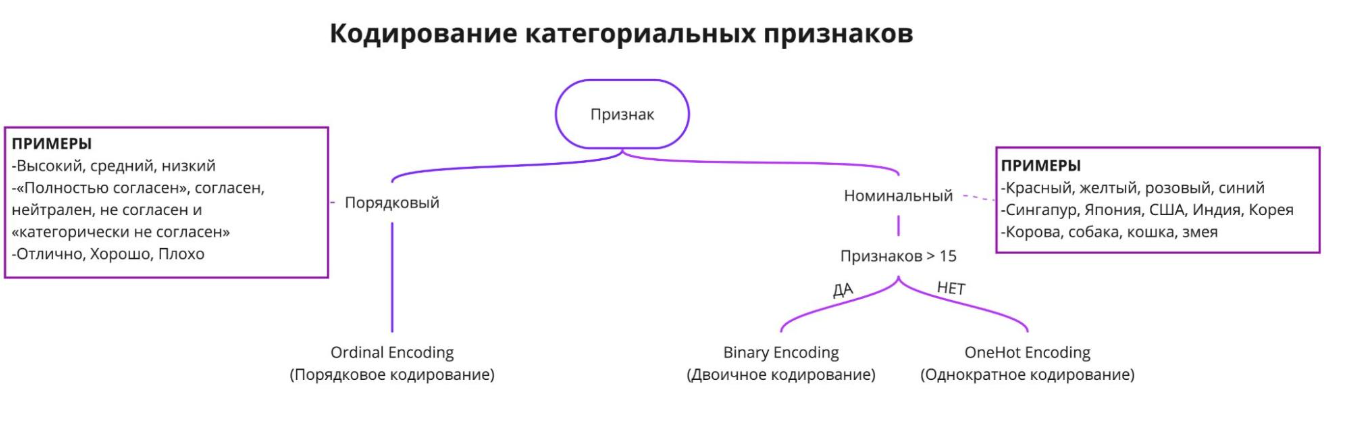

Для кодирования категориальных признаков мы будем использовать библиотеку category_encoders. Это удобная библиотека для кодирования категориальных переменных различными методами.

In [ ]:
%pip install category_encoders
import category_encoders as ce

<font color='yellow'>Порядковое кодирование</font> в библиотеке реализовано в классе <font color='green'>OrdinalEncoder</font>. По умолчанию все строковые столбцы будут закодированы.

Метод <font color='green'>fit_transform</font> устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод <font color='green'>concat()</font> для добавления закодированного признака в датафрейм data.

Порядковое кодирование <span style="background-color: #4e0707">плохо работает</span> для <font color='3499ff'>номинальных признаков</font>. Ошибку при кодировании мы не получим, но алгоритмы машинного обучения не могут различать категории и числовые признаки, поэтому могут быть сделаны выводы о неправильном порядке. 

<font color='yellow'>Однократное кодирование (горячее)</font> является автоматизированным кодированием. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории. Существует один минус: количество созданных признаков равно количеству уникальных значений категориального признака. 

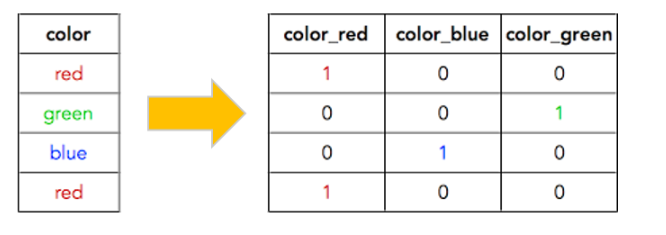

Используем класс <font color='green'>OneHotEncoding</font> библиотеки category_encoders </br>
Метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

```clothing_dummies = pd.get_dummies(clothing, columns=['type'])```

Новые бинарные признаки также часто называются <font color='3499ff'>dummy-признаками</font> или <font color='3499ff'>dummy-переменными</font>.  


Принцип <font color='yellow'>двоичного кодирования</font> похож на однократное кодирование, но создаёт меньше столбцов. При однократном кодировании признака с количеством уникальных категорий 100 шт. мы создадим 100 новых признаков, а при двоичном кодирования мы сгенерируем всего 7 признаков.

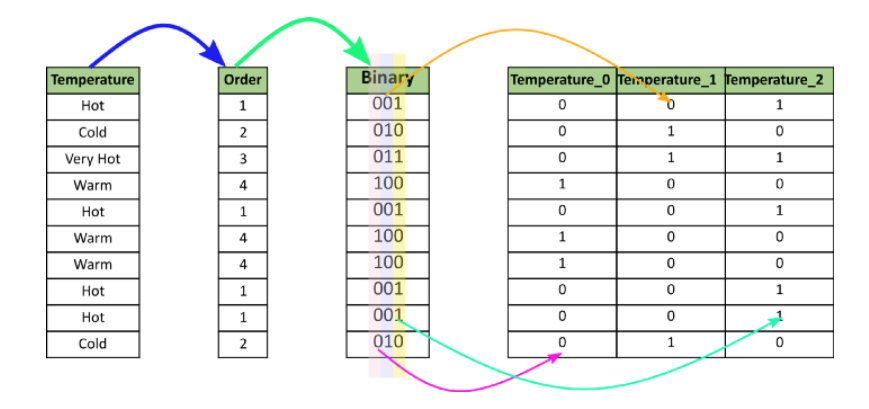

Пошаговый алгоритм двоичного кодирования можно описать так: 
1) значения признака кодируются в некоторый числовой порядок;
2) целые числа кодируются в двоичный код;
3) цифры двоичного представления формируют новые столбцы.

Используем класс <font color='green'>BinaryEncoder</font> библиотеки category_encoders.

Про другие, менее популярные способы кодирования вы можете прочитать в документации к используемой нами библиотеке category_encoders https://contrib.scikit-learn.org/category_encoders/ 

#### <font color='yellow'>Внешние источники данных</font>

Внешние источники данных — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые. Для получения информации из внешних источников данных специалисты по данным могут скачивать информацию с сайтов, парсить их и взаимодействовать с внешними сервисами по API.

Например, на сайте Федеральной службы государственной статистики (Росстат) https://rosstat.gov.ru/ вы можете скачать данные об общем приросте населения https://showdata.gks.ru/report/278934/ областей РФ в формате .XLSX, .CSV, .HTML, .DOCX. Вы уже работали с файлами различных форматов в модуле PYTHON-16. Как выгружать данные из файлов разных форматов.

Когда данные получить необходимо, а API у источника данных нет, дата-инженеры прибегают к парсингу. 

Внешняя информация бывает общая и профильная.</br>
Общая внешняя информация — это различные общие географические, экологические, статистические и другие данные. 
- географические: население страны, площадь страны, столица страны и так далее.
- экологические: среднегодовая температура местности, текущее время года, уровень загрязнения воздуха и так далее.
- статистические: доходы населения, половозрастной состав, уровень безработицы и так далее.</br>
Они находятся в открытых источниках: Росстат, Википедия и так далее.</br>
Профильная внешняя информация — информация, связанная со сферой бизнеса, проблему которого необходимо решить. </br>
Например, при прогнозировании рейтинга ресторана мы можем использовать ссылки на сайт TripAdvisor для парсинга и получения информации о ресторанах. При рекомендации фильмов в приложении мы можем пользоваться информацией с «Кинопоиска» о фильмах. Также это могут быть запросы в сервисы — запрос в Dadata.ru для проверки действительности адреса. </br>
Для доступа к такой информации часто применяются запросы по API, парсинг, работа с файлами.

#### <font color='yellow'>РАБОТА С ФАЙЛАМИ</font>

Можно получать новые признаки, используя общую внешнюю информацию и навыки выгрузки данных и файлов различных форматов - сопоставлять инфу из файлов с имеющимся датасетом. Более профессиональные методы, например парсинг, вы будете использовать в практических проектах, чтобы получить профильную внешнюю информацию.

Внешней информации можно получить очень много. Руководствуйтесь следующими <font color='3499ff'>правилами при работе с внешними источниками данных</font>:
1) Старайтесь найти профильную информацию по вашей бизнес-проблеме. При предсказании рейтинга фильма информация об успехе режиссёра в других картинах будет полезнее, чем среднегодовая температура страны, в которой снят фильм.

2) Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. Чем больше данных вы сгенерируете, тем выше вероятность получить качественные признаки на этапе отбора данных.

3) Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. Если останется время, можете попробовать другой подход.

4) Не уделяйте всё время разработки поиску дополнительной информации. Вам ещё будет необходимо построить модель, вывести её в продакшн — это также требует времени. 

5) Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг, в том числе и на шаг проектирования признаков.

## <font color='yellow'>Нормализация</font>

Операции нормализации и стандартизации также часто называют <font color='3499ff'>шкалированием</font>. 

<span style="background-color: #4e0707">Проблема</span>

Часто данные для обучения представлены в различных единицах измерения, в разном масштабе. Например, в наборе данных может быть представлен признак кадастровая стоимость недвижимости, которая измеряется в миллионах рублей, и признак понижающий коэффициент, который используется для определения налога на недвижимость и измеряется в сотых долях. Или, например, в одном наборе данных встречается признак доход клиента и стаж работы на последнем месте. Стаж в редких случаях поднимается выше 10, тогда как доход измеряется тысячами.

Результат эффективности работы будет формироваться в большей степени за счёт переменной, обозначающей доход из-за больших значений, которые может принимать переменная. Вклад второй переменной в итоговую оценку незначителен из-за её небольших значений Это связано только с тем, что входные данные имеют разный масштаб, а не из-за того, что вторая переменная не значима для результата. 

Таким образом, признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают <font color='3499ff'>преобразование признаков</font>.

<font color='yellow'>Нормализация</font> — один из методов преобразования входных признаков, при котором значения признаков приводятся к неким безразмерным единицам в рамках заданного диапазона (например, [0,...,1] или [-1,...,1]) либо с каким-то заданным свойством (например, стандартным отклонением, равным 1).

Существует несколько способов нормализации: <font color='green'>MinMaxScaler, RobustScaler</font>.



##### <font color='yellow'>MINMAXSCALER</font>
При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно. 

Нормализация происходит следующим способом:</br>
1) Из каждого значения признака х вычитается минимальное значение этого признака: </br> <i>x - min</i>  
2) Результат вычитания делится на разность между максимумом и минимумом признака:</br> <i>max - min</i>

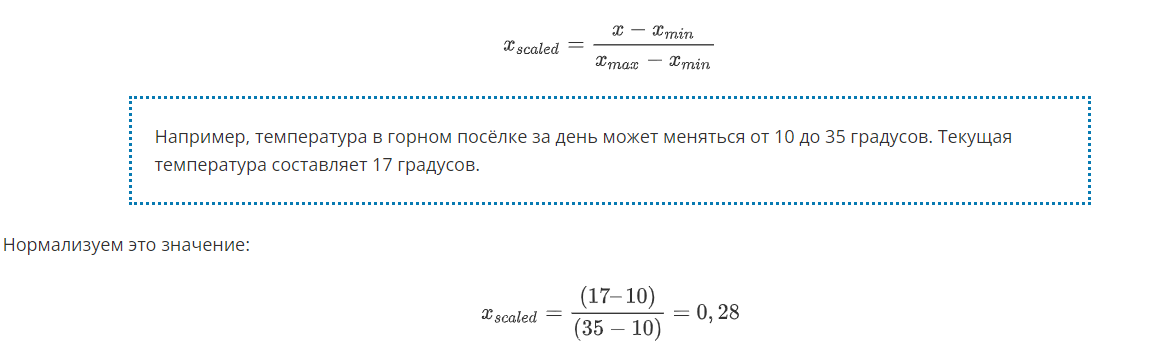

Класс <font color='green'>MinMaxScaler</font> делает вышеописанную нормализацию автоматически при помощи функции преобразования <font color='green'>fit_transform</font>.

<span style="background-color: #260F19">Поскольку <font color='green'>MinMaxScaler</font> использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет <b>чувствителен</b> к наличию выбросов в распределении.</span>

##### <font color='yellow'>ROBUSTSCALER</font>
Нормализация методом RobustScaler происходит в несколько этапов:

1) из каждого значения признака вычитается медиана признака: <i> x - median</i> 
2) полученное значение делится на межквартильный размах: <i> 75% значение - 25% значение</i> 

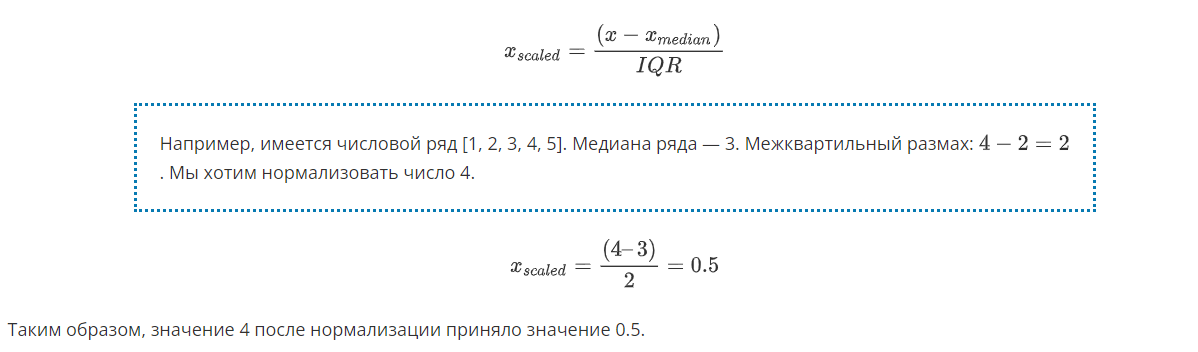

<span style="background-color: #182615"><font color='green'>RobustScaler</font> в вычислении использует перцентили, и поэтому <b>не зависит</b> даже от большого количества выбросов.</span>

Другие способы нормализации из библиотеки sklearn https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html 

#### <font color='yellow'>расчёт стандартного (среднеквадратического) отклонения</font>

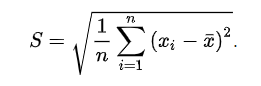

пример расчёта для множества {0, 6, 8, 14} </br>
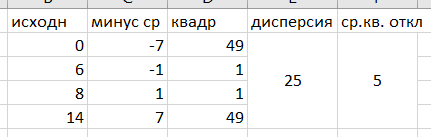


## <font color='yellow'>Стандартизация</font>

<font color='3499ff'>Стандартизация</font> — преобразование входных признаков, при котором изменяется распределение так, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

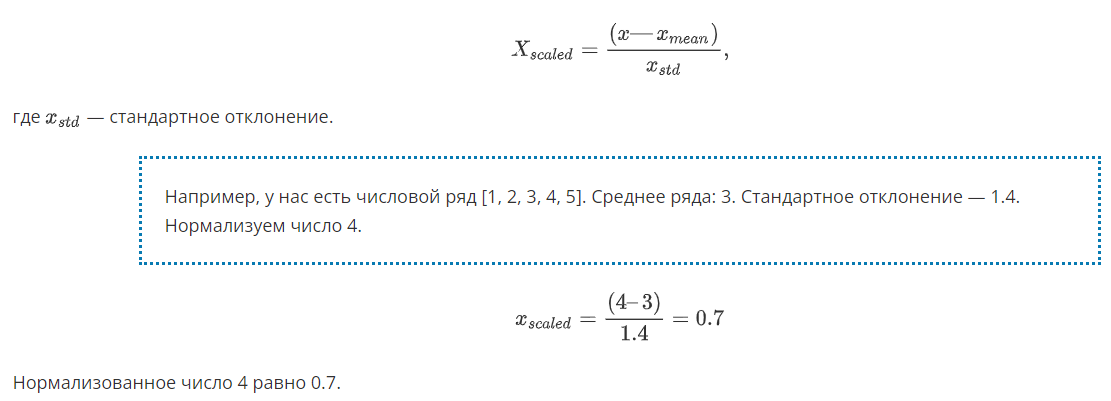

Этот процесс можно описать как <font color='3499ff'>центрирование данных с масштабированием</font>. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. </br>
Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

#### НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ?

- если признак распределён нормально, то его необходимо стандартизировать;
- если признак распределён ненормально, его необходимо нормализовать;
- если разброс значений небольшой, то можно обойтись без преобразования данных.

<b> Что лучше? Нормализовать, а потом стандартизировать или наоборот?</b>

Комбинации преобразований также могут быть эффективны. Поэтому проводите эксперименты над моделью и выбирайте то сочетание преобразований, которые обеспечивают лучший результат на ваших данных.

## <font color='yellow'>Отбор признаков. Мультиколлинеарность</font>

<b> Отбор признаков</b> — процесс выбора важных признаков, наиболее влияющих на предсказание, чтобы:
- Сократить время обучения.
- Повысить качество предсказания.

<font color='3499ff'>Мультиколлинеарность</font> — сильная корреляционная связь между признаками, отбираемыми для обучения. Некоторые модели плохо работают на данных с мультиколлинеарностью.

1) Проводим корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.
2) Чтобы построить модель на этом наборе данных, сделаем отбор признаков — удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше).
3) Начнём с самого высокого коэффициента корреляции, удалим любой признак из этой пары (предпочтительно тот, который скоррелирован с другими признаками, если такие имеются)
4) Удалим оставшиеся коррелирующие признаки

У нас остаются признаки с низким коэффициентом корреляции и признак, который необходимо предсказать. В идеале, если связь между оставшимися признаками очень слабая. Эти признаки будут включены в итоговый набор данных для обучения. </br> Анализ мультиколлинеарности и исключение сильно скоррелированных признаков помогает отобрать признаки для модели, уменьшить количество признаков, исключить повторяющуюся информацию.

Вы можете удалять любой признак из пары. Однако удобнее оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 